In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact
import numpy as np
import ast

In [26]:
def top_hashtag(df):
    df['hashtags'] = df['hashtags'].str.split()

    df_expanded = df.explode('hashtags').reset_index(drop=True)
    def plot_top_hashtags(year):
        df_year = df_expanded[df_expanded['year'] == year]
        
        hashtag_counts = df_year['hashtags'].value_counts().reset_index()
        hashtag_counts.columns = ['hashtag', 'count']
        
        top_hashtags = hashtag_counts.head(5)
        
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=top_hashtags, x='hashtag', y='count', palette='viridis')
        
        plt.title(f'Top 5 Hashtags más usados en el año {year}')
        plt.xticks(rotation=45)
        plt.ylabel("Cantidad de veces usadas")
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.0f}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='center', fontsize=12, color='black', 
                        xytext=(0, 8), textcoords='offset points')
        
        plt.show()
    min_year = df_expanded['year'].min()
    max_year = df_expanded['year'].max()
    year_slider = widgets.IntSlider(
        value=min_year,
        min=min_year,
        max=max_year,
        step=1,
        description='Año:',
        continuous_update=False
    )

    interact(plot_top_hashtags, year=year_slider)


def hash_view_top(df):

    df['hashtags'] = df['hashtags'].str.split()        
    df_expanded = df.explode('hashtags').reset_index(drop=True)

    def plot_top_hashtags_views(year):
        

        df_year = df_expanded[df_expanded['year'] == year]
        
        top_hashtag_views = df_year.groupby(['month', 'hashtags'])['playCount'].sum().reset_index()
        
        top_hashtag_views = top_hashtag_views.loc[top_hashtag_views.groupby('month')['playCount'].idxmax()]
        
        dic = {
            1: "Enero",
            2: "Febrero",
            3: "Marzo",
            4: "Abril",
            5: "Mayo",
            6: "Junio",
            7: "Julio",
            8: "Agosto",
            9: "Setiembre",
            10: "Octubre",
            11: "Noviembre",
            12: "Diciembre"
        }
        
        top_hashtag_views['month'] = top_hashtag_views['month'].map(dic)
        
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=top_hashtag_views, x='month', y='playCount', hue='hashtags', dodge=False)
        
        plt.title(f'Hashtag con más vistas por mes en el año {year}')
        
        plt.xticks(rotation=45)
        
        plt.legend(title='Hashtag', loc='upper right')
        
        for p in ax.patches:
            height = p.get_height()
            
            if not np.isnan(height):
                ax.annotate(f'{int(height)}', 
                            (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', 
                            fontsize=12, color='black', 
                            xytext=(0, 8), textcoords='offset points')
        
        plt.show()
    min_year = df_expanded['year'].min()
    max_year = df_expanded['year'].max()
    year_slider = widgets.IntSlider(
        value=min_year,
        min=min_year,
        max=max_year,
        step=1,
        description='Año:',
        continuous_update=False  
    )
    interact(plot_top_hashtags_views, year=year_slider)

def interacion(df):
    df_grouped = df.groupby(['year', 'month']).agg({'diggCount': 'sum', 'shareCount': 'sum', 'playCount': 'sum'}).reset_index()

    def plot_interaction(interaction_type):
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=df_grouped, x='month', y=interaction_type, hue='year', marker='o')
        plt.title(f'{interaction_type} por Mes y Año')
        plt.xlabel('Mes')
        plt.ylabel('Cantidad de Interacciones')
        plt.xticks(rotation= 90,ticks=range(1, 13), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
        
        plt.legend(title='Año')
        plt.show()

    interact(plot_interaction, interaction_type=['diggCount', 'shareCount', 'playCount'])

def interacion_year(df):
    df_grouped = df.groupby(['year', 'month']).agg({'diggCount': 'sum', 'shareCount': 'sum', 'playCount': 'sum'}).reset_index()

    def plot_interaction(year):
        df_year = df_grouped[df_grouped['year'] == year]
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=df_year, x='month', y='diggCount', marker='o', label='Diggs')
        sns.lineplot(data=df_year, x='month', y='shareCount', marker='o', label='Shares')
        sns.lineplot(data=df_year, x='month', y='playCount', marker='o', label='Plays')
        
        plt.title(f'Interacciones en el Año {year}')
        plt.xlabel('Mes')
        plt.ylabel('Cantidad de Interacciones')
        plt.xticks(rotation=90, ticks=range(1, 13), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
        plt.legend(title='Interacción')
        plt.show()
    min_year = df['year'].min()
    max_year = df['year'].max()

    year_slider = widgets.IntSlider(
        value=min_year,
        min=min_year,
        max=max_year,
        step=1,
        description='Año:',
        continuous_update=False  
    )

    interact(plot_interaction, year=year_slider)

def engagement_fans(df):
    def engag_fans_year(year):
        df_year = df[df['year'] == year]

        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df_year, x='fans', y='engagement_ratio', alpha=0.6, color='blue')

        plt.title('Relación entre Engagement y Fans')
        plt.xlabel('Número de Fans')
        plt.ylabel('Engagement Ratio')
        plt.show()
    min_year = df['year'].min()
    max_year = df['year'].max()

    year_slider = widgets.IntSlider(
        value=min_year,
        min=min_year,
        max=max_year,
        step=1,
        description='Año:',
        continuous_update=False  
    )

    interact(engag_fans_year, year=year_slider)

def sentiment_per(df):
    df_temp= df.copy()
    def parse_sentiment(sentiment_str):
        if sentiment_str == 'No text provided': 
            return None
        
        try:
            sentiment_str = sentiment_str.replace('[', '{').replace(']', '}')
            
            sentiment_dict = ast.literal_eval(sentiment_str)
            
            if isinstance(sentiment_dict, dict):
                return sentiment_dict
        except Exception as e:
            print(f"Error en la conversión de la cadena: {e}") 
            return None 

    df_temp['sentiment_percentages'] = df_temp['sentiment_percentages'].apply(parse_sentiment)


    sentiments = ['happiness', 'sadness', 'anger', 'fear', 'surprise']

    for sentiment in sentiments:
        df_temp[sentiment] = df_temp['sentiment_percentages'].apply(lambda x: x.get(sentiment, np.nan) if isinstance(x, dict) else np.nan)


    df_temp[sentiments] = df_temp[sentiments].replace('No text provided', np.nan)

    df_grouped = df_temp.groupby(['year', 'month'])[sentiments].mean().reset_index()

    df_grouped['year'] = df_grouped['year'].astype(int)
    df_grouped['month'] = df_grouped['month'].astype(int)


    def plot_sentiment_heatmap(sentiment):
        pivot_table = df_grouped.pivot_table(index='month', columns='year', values=sentiment)

        pivot_table = pivot_table.dropna(how='all', axis=0)  # Elimina filas con solo NaN
        pivot_table = pivot_table.dropna(how='all', axis=1)  # Elimina columnas con solo NaN

        if not pivot_table.empty:
            plt.figure(figsize=(12, 6))
            sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')

            plt.title(f'Sentimiento Promedio de {sentiment.capitalize()} por Año y Mes')
            plt.xlabel('Año')
            plt.ylabel('Mes')
            plt.yticks(ticks=range(1, 13), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=0)
            plt.show()
        else:
            print(f"No hay datos suficientes para {sentiment.capitalize()}.")

    interact(plot_sentiment_heatmap, sentiment=sentiments);

def duracion_reaccion(df_video):
    df_video['engagement'] = df_video['shareCount'] + df_video['collectCount'] + df_video['commentCount'] + df_video['playCount']

    plt.figure(figsize=(10, 6))
    plt.scatter(df_video['duration'], df_video['engagement'], alpha=0.5)
    plt.title('Relación entre Duración y Número de Reacciones (Engagement)')
    plt.xlabel('Duración (segundos)')
    plt.ylabel('Número de Reacciones (Engagement)')
    plt.grid(True)
    plt.show()

def vistas_coments(df):
    def vi_co(year):
        df_temp=df[df['year'] == year]
        plt.figure(figsize=(10, 6))
        plt.scatter(df_temp['commentCount'], df_temp['playCount'], alpha=0.5)
        plt.title('Relación entre la Cuenta de Comentarios y la Reacción de Vistas')
        plt.xlabel('Cuenta de Comentarios')
        plt.ylabel('Cantidad de Vistas')
        plt.grid(True)

        plt.show()
    min_year = df['year'].min()
    max_year = df['year'].max()

    year_slider = widgets.IntSlider(
        value=min_year,
        min=min_year,
        max=max_year,
        step=1,
        description='Año:',
        continuous_update=False  
    )

    interact(vi_co, year=year_slider)


def reac_commen(df):
    
    def año_reactio_commen(year):
        df_temp=df[df['year'] == year].copy()
        df_temp['total_reactions'] = df_temp['playCount'] + df_temp['shareCount'] + df_temp['diggCount']
        plt.figure(figsize=(10, 6))
        plt.scatter(df_temp['commentCount'], df_temp['total_reactions'], alpha=0.5)
        plt.title('Cantidad de Comentarios vs. Reacciones (Plays, Shares, Diggs)')
        plt.xlabel('Cantidad de Comentarios')
        plt.ylabel('Reacciones Totales')
        plt.grid(True)

        plt.show()
    min_year = df['year'].min()
    max_year = df['year'].max()

    year_slider = widgets.IntSlider(
        value=min_year,
        min=min_year,
        max=max_year,
        step=1,
        description='Año:',
        continuous_update=False  
    )

    interact(año_reactio_commen, year=year_slider)

def Seguido_comen(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['fans'], df['commentCount'], alpha=0.5)
    plt.title('Relación entre Seguidores y Comentarios')
    plt.xlabel('Número de Seguidores (Fans)')
    plt.ylabel('Cuenta de Comentarios')
    plt.show()

def canción_más_vistas_por_mes(df):
    
    def canción_más_vistas_por_mes_y_año(year):
        df_temp = df[df['year'] == year]
        
        monthly_data = df_temp.groupby(['year', 'month', 'musicName'])['playCount'].sum().reset_index()

        max_views_per_month = monthly_data.loc[monthly_data.groupby(['month'])['playCount'].idxmax()]
        month_names = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                       'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

        plt.figure(figsize=(12, 8))
        for month in range(1, 13):
            song_data = max_views_per_month[max_views_per_month['month'] == month]
            
            if not song_data.empty:
                plt.bar(month, song_data['playCount'].values[0], label=song_data['musicName'].values[0])

        plt.title(f'Canción con Más Vistas por Mes - Año {year}')
        plt.xlabel('Mes')
        plt.ylabel('Número de Reproducciones')
        plt.xticks(range(1, 13), month_names, rotation=90)  
        plt.legend(title='Canción', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()

    min_year = df['year'].min()
    max_year = df['year'].max()

    year_slider = widgets.IntSlider(
        value=min_year,
        min=min_year,
        max=max_year,
        step=1,
        description='Año:',
        continuous_update=False  
    )

    interact(canción_más_vistas_por_mes_y_año, year=year_slider)


Gráfica de Hashtags más usados por año


interactive(children=(IntSlider(value=2020, continuous_update=False, description='Año:', max=2024, min=2020), …

Hashtags con más vista por cada mes


interactive(children=(IntSlider(value=2020, continuous_update=False, description='Año:', max=2024, min=2020), …

Interacciones por mes y Año


interactive(children=(Dropdown(description='interaction_type', options=('diggCount', 'shareCount', 'playCount'…

Interacciones por Año


interactive(children=(IntSlider(value=2020, continuous_update=False, description='Año:', max=2024, min=2020), …

Relación de engagmente y fans por año


interactive(children=(IntSlider(value=2020, continuous_update=False, description='Año:', max=2024, min=2020), …

Promedio de sentimeinto por año y mes


interactive(children=(Dropdown(description='sentiment', options=('happiness', 'sadness', 'anger', 'fear', 'sur…

relacion de duración de video por número de interacciones


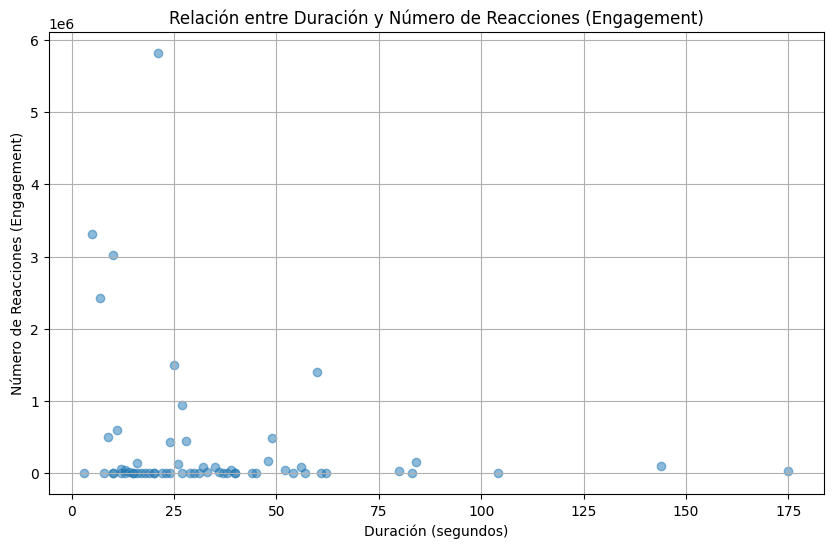

relación de vistas vs comentarios


interactive(children=(IntSlider(value=2020, continuous_update=False, description='Año:', max=2024, min=2020), …

Relación de reacciones por comentarios


interactive(children=(IntSlider(value=2020, continuous_update=False, description='Año:', max=2024, min=2020), …

Relación de seguidores y comentarios


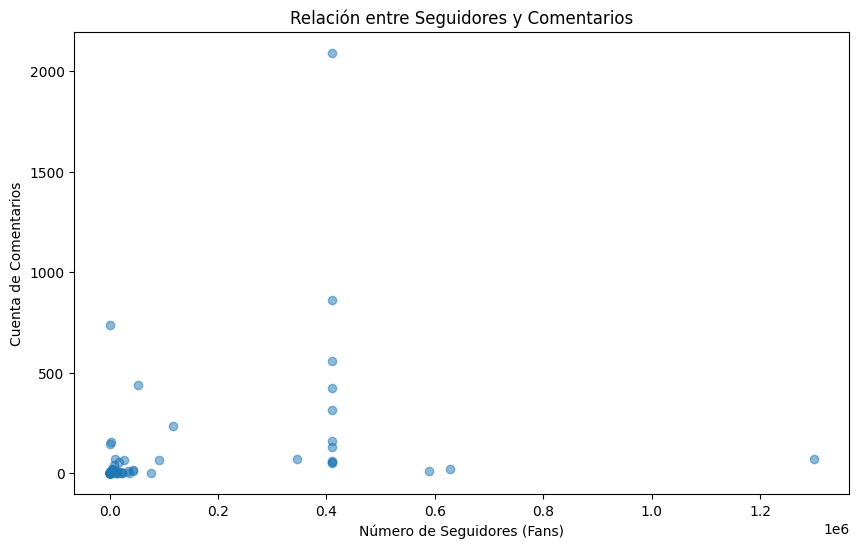

Canciones más visats por mes


interactive(children=(IntSlider(value=2020, continuous_update=False, description='Año:', max=2024, min=2020), …

In [34]:
def main():
    df= pd.read_csv("dataset.csv")
    print("Gráfica de Hashtags más usados por año")
    top_hashtag(df.copy())
    
    print("Hashtags con más vista por cada mes")
    hash_view_top(df.copy())
    print("Interacciones por mes y Año")

    interacion(df.copy())

    print("Interacciones por Año")
    interacion_year(df.copy())

    print("Relación de engagmente y fans por año")
    engagement_fans(df.copy())

    print("Promedio de sentimeinto por año y mes")
    sentiment_per(df.copy())

    df_video=pd.read_csv('videos_playcount.csv')

    print("relacion de duración de video por número de interacciones")
    duracion_reaccion(df_video.copy())

    print("relación de vistas vs comentarios")
    vistas_coments(df.copy())

    print("Relación de reacciones por comentarios")

    reac_commen(df.copy())

    print("Relación de seguidores y comentarios")
    Seguido_comen(df.copy())

    print("Canciones más visats por mes")
    canción_más_vistas_por_mes(df.copy())

if __name__ == "__main__":
    main()